## Using TensorFlow to implement the linear regression algorithm

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [7]:
learning_rate = 0.01
training_iterations = 1000
display_step = 50

## Random training data

In [8]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [10]:
X = tf.placeholder('float')
Y = tf.placeholder('float')

W = tf.Variable(rng.randn(), name = 'weight')
b = tf.Variable(rng.randn(), name = 'bias')

In [16]:
pred = tf.add(tf.multiply(X,W), b)

In [18]:
# mean squared error

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

# gradient descent

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [19]:
init = tf.global_variables_initializer()

In [29]:
# Running TF sessions to find output of (xW + b) and plotting to compare

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_iterations):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict = {X:x, Y:y})
    
        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict = {X:x, Y:y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))
                
    print ("optimization complete")
    training_cost = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
    print ("Training cost = ", training_cost, "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')



Epoch: 0050 cost= 0.007298284 W= 0.438494 b= -0.55747
Epoch: 0100 cost= 0.006012765 W= 0.427259 b= -0.476647
Epoch: 0150 cost= 0.004917257 W= 0.416693 b= -0.400632
Epoch: 0200 cost= 0.003987370 W= 0.406754 b= -0.329138
Epoch: 0250 cost= 0.003201642 W= 0.397407 b= -0.261896
Epoch: 0300 cost= 0.002541238 W= 0.388616 b= -0.198653
Epoch: 0350 cost= 0.001989650 W= 0.380348 b= -0.139171
Epoch: 0400 cost= 0.001532376 W= 0.372571 b= -0.083227
Epoch: 0450 cost= 0.001156700 W= 0.365257 b= -0.0306101
Epoch: 0500 cost= 0.000851500 W= 0.358378 b= 0.0188774
Epoch: 0550 cost= 0.000607026 W= 0.351908 b= 0.0654216
Epoch: 0600 cost= 0.000414755 W= 0.345823 b= 0.109198
Epoch: 0650 cost= 0.000267234 W= 0.3401 b= 0.15037
Epoch: 0700 cost= 0.000157952 W= 0.334717 b= 0.189094
Epoch: 0750 cost= 0.000081241 W= 0.329654 b= 0.225515
Epoch: 0800 cost= 0.000032152 W= 0.324893 b= 0.259769
Epoch: 0850 cost= 0.000006381 W= 0.320414 b= 0.291986
Epoch: 0900 cost= 0.000000186 W= 0.316202 b= 0.322288
Epoch: 0950 cost= 0.

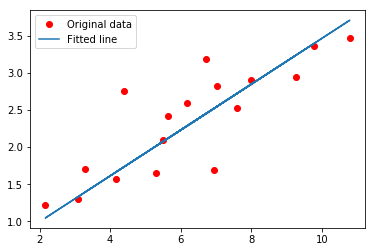